# Zomato Dataset


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [97]:
df=pd.read_csv('D:\Development\EDA\Practice\Raw\zomato.csv',encoding='latin-1')
df.head()
df.columns

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vernon\AppData\Local\Temp\ipykernel_9528\3513361278.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv('D:\Development\EDA\Practice\Raw\zomato.csv',encoding='latin-1')


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [99]:
df.describe() #only numerical features 
# df.describe(include='all') #all features

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Missing values

In [100]:
df.shape

(9551, 21)

In [101]:
df.isnull().sum()
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [102]:
df_country=pd.read_excel("D:\Development\EDA\Practice\Raw\Country-Code.xlsx")
df_country.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vernon\AppData\Local\Temp\ipykernel_9528\4149678880.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_country=pd.read_excel("D:\Development\EDA\Practice\Raw\Country-Code.xlsx")


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [103]:
#merging two datasets
final_df=pd.merge(df,df_country,on='Country Code',how='left')

In [104]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [105]:
final_df.columns
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [106]:
country_values=final_df.Country.value_counts()
final_df.Country.value_counts()
#Insigts
# Zomato has maximum records from India 

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [107]:
country_name=final_df.Country.value_counts().index
final_df.Country.value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

([<matplotlib.patches.Wedge at 0x23418b0da90>,
 [Text(-1.082974277862112, 0.1927867046480056, 'India'),
  Text(1.0772816964394372, -0.22240536530526556, 'United States'),
  Text(1.0995865232164619, -0.030157552300104404, 'United Kingdom')],
 [Text(-0.5907132424702428, 0.10515638435345759, '94.39%'),
  Text(0.5876081980578747, -0.12131201743923574, '4.73%'),
  Text(0.5997744672089791, -0.01644957398187513, '0.87%')])

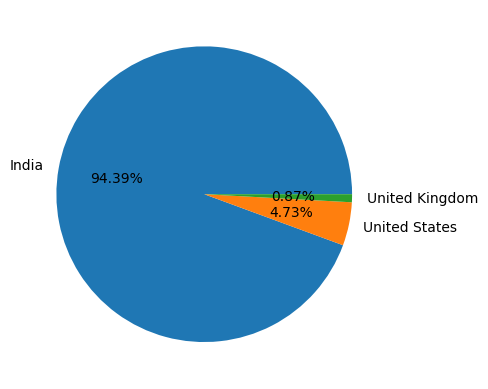

In [108]:
#Top 3 countries that uses Zomato 
plt.pie(country_values[:3],labels=country_name[:3],autopct='%1.2f%%')

# Insigts
# 1.India 
# 2.United States
# 3.UK

In [109]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [110]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

#reset index will reset the extreme left column
#Insgihts
# when rating is between 45.5 to 4.9 is excellent 
# when rating is from 4.0 to 4.4 it is very Good
# when ratings  is from 3.5 to 3.9 it is Good
# when ratings is from 2.5 to 3.4 it is Average
# when ratings is from 1.8 to 2.4 ii is poor

In [111]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

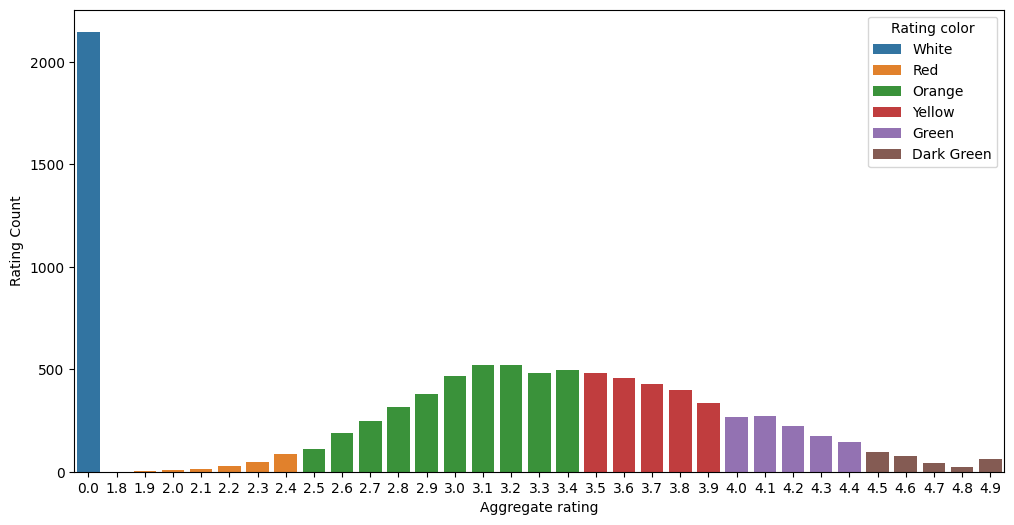

In [116]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings,hue='Rating color')
#to increase the size of the plot

In [ ]:
#Insigts
# 1.Blue color bar has maximum number of ratings
# 2.maximum number of ratings are between 2.5 to 3.4


<Axes: xlabel='Rating color', ylabel='count'>

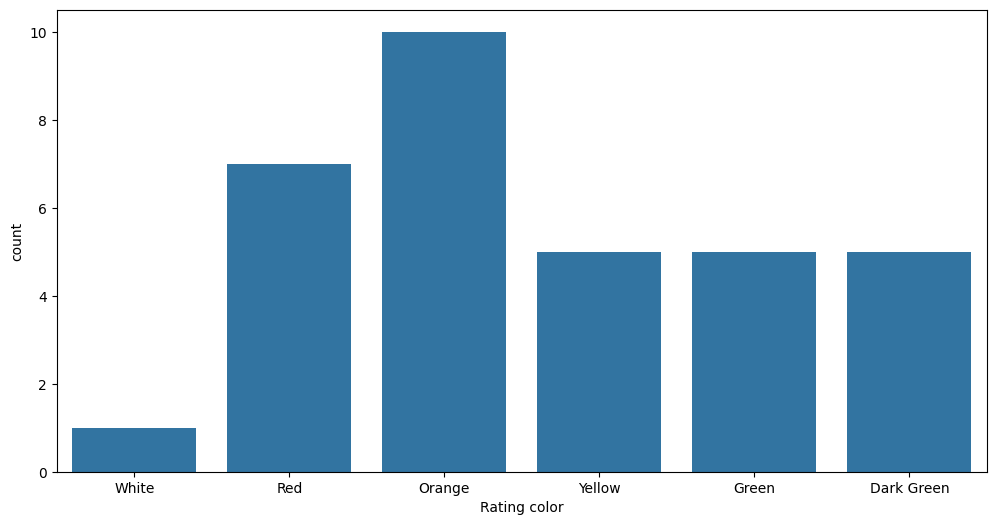

In [ ]:
#Count Plot-it shpws the frequency of each category
sns.countplot(x='Rating color',data=ratings)

In [ ]:
###find the country name that has given 0 Rating 
final_df[final_df['Aggregate rating']==0].groupby('Country').size().reset_index(name='Count')

#MInsights
#Maximum number of 0 ratings are from India 

,Country,Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [124]:
#find out the which currency is used by which country
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='Count')

,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index(name='Count')
#insights
#In dubai we have online delivery option available but not in India

,Has Online delivery,Country,Count
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


([<matplotlib.patches.Wedge at 0x2341a8e7390>,
 [Text(-0.6836226235765238, 0.8617772963674261, 'New Delhi'),
  Text(0.24897521967717012, -1.07145291076496, 'Gurgaon'),
  Text(0.9941444825293274, -0.47082560238000676, 'Noida')],
 [Text(-0.3728850674053766, 0.4700603434731414, '71.35%'),
  Text(0.13580466527845642, -0.5844288604172508, '14.57%'),
  Text(0.5422606268341785, -0.2568139649345491, '14.08%')])

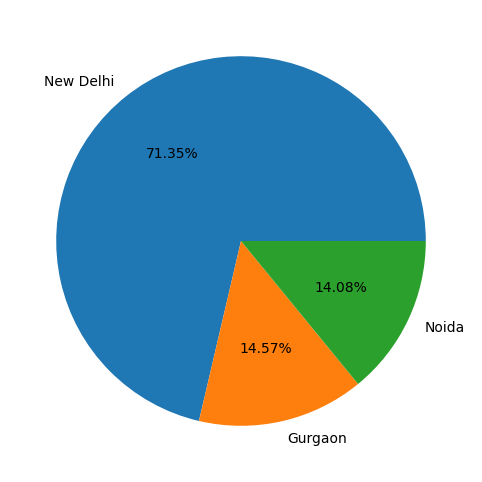

In [137]:
# Pie chart for cities distribution
final_df.City.value_counts().index
plt.pie(final_df.City.value_counts()[:3],labels=final_df.City.value_counts().index[:3],autopct='%1.2f%%')
#insights
#In India maximum number of zomato records are from 3 cities
#1. New Delhi
#2. Gurgaon
#3. Noida

# Numerical variables

In [139]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [138]:
[ features1 for features1 in df.columns if df[features1].dtype!='object']

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

# Note 
# This data set for just for the practice so we dint focus on the distribution and all that stuff 
# since we are not doing any machine learning modeling with this dataset